# So, is the climate changing?

First things first – make sure to load the climate `DataFrame` you
stored in the previous notebooks using Jupyter cell magic:

In [8]:
# Load all stored variables
%store -r

## Quantify how fast the climate is changing with a trend line

Global climate change causes different effects in different places when
we zoom in to a local area. However, you probably noticed when you
looked at mean annual temperatures over time that they were rising. We
can use a technique called **Linear Ordinary Least Squares (OLS)
Regression** to determine how quickly temperatures are rising on
average.

Before we get started, it’s important to consider that OLS regression is
not always the right technique, because it makes some important
assumptions about our data:

### Random error  
Variation in temperature can be caused by many things beyond global
climate change. For example, temperatures often vary with patterns of
ocean surface temperatures (*teleconnections*), the most famous of which
are El Niño and La Niña. By using a linear OLS regression, we’re
assuming that all the variation in temperature except for climate change
is random. 

### Normally distributed error
If you have taken a statistics class, you probably learned a lot about
the normal, or Gaussian distribution. For right now, what you need to
know is that OLS regression is useful for identifying trends in average
temperature, but wouldn’t be appropriate for looking at trends in daily
precipitation (because most days have zero precipitation), or at maximum
or minimum annual temperatures (because these are extreme values, and
the normal distribution tends to underestimate the likelihood of large
events). 

### Linearity
We’re assuming that temperatures are increasing or decreasing at a
constant rate over time. We wouldn’t be able to look at rates that
change over time. For example, many locations in the Arctic remained the
same temperature for much longer than the rest of the world, because ice
melt was absorbing all the extra heat. Linear OLS regression wouldn’t be
able to identify when the temperature rise began on its own.

### Stationarity

We’re assuming that variation in temperature caused by things *other*
than global climate change (e.g. the random error) behaves the same over
time. For example, the linear OLS regression can’t take increased
variability from year to year into account, which is a common effect of
climate change. We often see “global weirding”, or more extreme head
*and* cold, in addition to overall increases. You can observe this most
easily by looking at your daily data again. Does it seem to be fanning
in or out over time?



## YOUR TASK: Is linear OLS regression right for your data?

It’s pretty rare to encounter a perfect statistical model where all the
assumptions are met, but you want to be on the lookout for serious
discrepancies, especially when making predictions. For example,
[ignoring assumptions about Gaussian error arguably led to the 2008
financial crash](https://www.wired.com/2009/02/wp-quant/).

1. Take a look at your data. In the cell below, write a few
    sentences about ways your data does and does not meet the linear OLS
    regression assumptions.

### OLS assumption caveats
* All error in the data may not be random. Temperature measurements may be systematically biased in one direction. For example, if the location has more or less sunlight than average. 
* Any error that is not systematic is likely normally distributed as long as we are interpreting error to mean incorrect measurement and not uncertainty. 
* Global temperature increase due to climate change is not necessrily linear and therefore the increasing temperature may not be linear. The linearirty may also be affected if the area surrounding the temperature measurement has changed significantly over the last 100 years — which is likely. 

> **Your task:**
>
> The following cell contains package imports that you will need to
> calculate and plot an OLS Linear trend line. Make sure to run the cell
> before moving on, and if you have any additional packages you would
> like to use, add them here later on.

In [25]:
# Advanced options on matplotlib/seaborn/pandas plots
import matplotlib.pyplot as plt
# Common statistical plots for tabular data
import seaborn as sns
# Fit an OLS linear regression
from sklearn.linear_model import LinearRegression
# import Pandas
import pandas as pd

> **Your task: Regression**
>
> 1.  To get sample code, ask ChatGPT how to fit a linear model to your
>     data. If you’re new to using large language modesl, go ahead and
>     check out [our
>     query](https://chatgpt.com/share/649b897b-9075-457e-8e12-308f795312a1)
> 2.  Copy code that uses the `scikit-learn` package to perform a OLS
>     linear regression to the code cell below.
> 3.  Check out your previous plot. Does it make sense to include all
>     the data when calculating a trend line? Be sure to select out data
>     that meets the OLS assumptions.

> **Note**
>
> We know that some computers, networks, and countries block LLM (large
> language model) sites, and that LLMs can sometimes perpetuate
> oppressive or offensive language and ideas. However, LLMs are
> increasingly standard tools for programming – [according to
> GitHub](https://github.com/features/copilot) many developers code 55%
> faster with LLM assistance. We also see in our classes that LLMs give
> students the ability to work on complex real-world problems earlier
> on. We feel it’s worth the trade-off, and at this point we would be
> doing you a disservice professionally to teach you to code without
> LLMs. If you can’t access them, don’t worry – we’ll present a variety
> of options for finding example code. For example, you can also search
> for an example on a site like
> [StackOverflow](https://stackoverflow.com/) (this is how we all
> learned to code, and with the right question it’s a fantastic resource
> for any coder to get access to up-to-date information from world
> experts quickly). You can also use our solutions as a starting point.

In [26]:
# Fit an OLS Linear Regression to the data
a_climate_df_rs = ann_climate_df_w_units.reset_index()

# Remove the rows with NaN in temperature
a_climate_df_rs_clean = a_climate_df_rs.dropna(subset=['TOBS_C'])

# Extract the year from the 'DATE' column and use it as the independent variable
a_climate_df_rs_clean['Year'] = pd.to_datetime(a_climate_df_rs_clean['DATE']).dt.year

# Reshape 'Year' column to be a 2D array for scikit-learn
X = a_climate_df_rs_clean[['Year']].values
y = a_climate_df_rs_clean['TOBS_C'].values

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the slope and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Print the results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")

Slope: 0.018095139055852492
Intercept: -22.988033588959425


/tmp/ipykernel_2398/3568256801.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a_climate_df_rs_clean['Year'] = pd.to_datetime(a_climate_df_rs_clean['DATE']).dt.year


## Plot your trend line

Trend lines are often used to help your audience understand and process
a time-series plot. In this case, we’ve chosed mean temperature values
rather than extremes, so we think OLS is an appropriate model to use to
show a trend.

> **Is it ok to plot a trend line even if OLS isn’t an appropriate
> model?**
>
> This is a tricky issue. When it comes to a trend line, choosing a
> model that is technically more appropriate may require much more
> complex code without resulting in a noticeably different trend line.
>
> We think an OLS trend line is an ok visual tool to indicate the
> approximate direction and size of a trend. If you are showing standard
> error, making predictions or inferences based on your model, or
> calculating probabilities (p-values) based on your model, or making
> statements about the statistical significance of a trend, we’d suggest
> reconsidering your choice of model.

#  Your task: Regression

1.  Add values for x (year) and y (temperature) to plot a regression
    plot. You will have to select out the year from the index values,
    just like you probably did when fitting your linear model above!
2.  Label the axes of your plot with the `title`, `xlabel`, and `ylabel`
    parameters of `ax.set()`. This function takes your plot and changes the settings. You can see how to add the degree symbol in the example
    below. Make sure your labels match what you’re plotting! :::

/tmp/ipykernel_2398/3637120431.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a_climate_df_rs_clean['DATE_year'] = a_climate_df_rs_clean['DATE'].dt.year


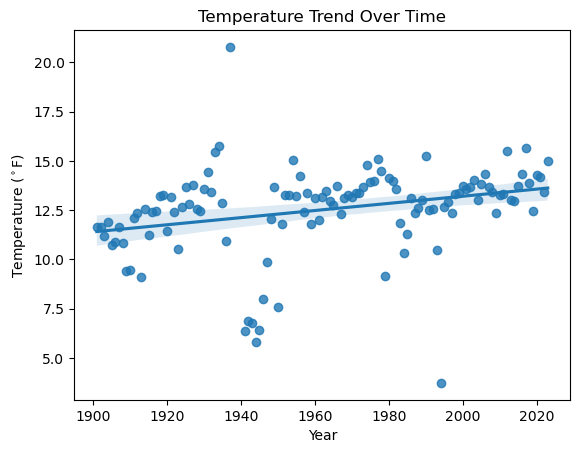

In [21]:
# Plot annual average temperature data with a trend line
# Convert DATE to year only
a_climate_df_rs_clean['DATE_year'] = a_climate_df_rs_clean['DATE'].dt.year

# Plot using the year as x-axis
ax = sns.regplot(
    x=a_climate_df_rs_clean['DATE_year'],  # Use the extracted year
    y=a_climate_df_rs_clean['TOBS_C'].values
)

# Set plot labels
ax.set(
    title='Temperature Trend Over Time',
    xlabel='Year',
    ylabel='Temperature ($^\circ$F)'
)

# Display the plot without extra text
plt.show()

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Interpret the trend</div></div><div class="callout-body-container callout-body"><ol type="1">
<li><p>Create a new Markdown cell below this one.</p></li>
<li><p>Write a plot headline. Your headline should
<strong>interpret</strong> your plot, unlike a caption which neutrally
describes the image.</p></li>
<li><p>Is the climate changing? How much? Report the slope of your trend
line.</p></li>
</ol></div></div>

## Increasing Temperature in Boulder CO over the last 120 years.

A OLS model suggests that the temperature increases by 0.02 degrees celsius each year. This means that the temperature has increased by more than 2 degrees celsius over the last 120 years. 